#  New Testcase
In the previous testcase, the test images used were randomly selected from 1942 issues of the Freiheitskampf newspaper on the SLUB website. To process all pages of the 1942 newspapers in bulk, mass image rights were obtained. However, it was noted that the form of [mass images](http://localhost:8888/view/Desktop/00000003.tif.large.jpg) differed slightly from those used in the previous testcase. Specifically, the original images had an additional gray area at the bottom with SLUB copyright information. Since this part is irrelevant for OLR and OCR recognition, it needs to be removed. The algorithm used in the previous testcase was basic and unable to make more complex judgements, necessitating a reevaluation and application of a new algorithm.

## Image cropping
This algorithm utilizes two Python libraries: OpenCV and NumPy. OpenCV is an open-source computer vision and machine learning software library that offers a wide range of image processing functions, including reading, converting, and edge detection of images. In this algorithm, OpenCV is used for reading images, converting them to grayscale, edge detection, dilation operations, and locating and cropping specific areas of an image. NumPy, widely used for array processing, is employed here for creating and manipulating arrays. In the algorithm, NumPy is used to create and modify masks for image processing.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Algorithm chosing
**Core Principle**: The algorithm starts by converting a color image into grayscale, simplifying the processing. It then uses the Canny algorithm to detect edges in the image, highlighting the structure. Next, dilation is applied to strengthen these edges, making the main shapes in the image more distinct. The algorithm then identifies the largest of these shapes, typically representing the most significant part of the image. Finally, it crops the original image based on the boundaries of this largest shape, focusing on the main content. In summary, this algorithm identifies and extracts the primary elements of an image, removing unnecessary background.

In [3]:
def auto_crop_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
    edges = cv2.Canny(gray, 50, 150) # Detect edges in the image using the Canny algorithm

    # Define a kernel for dilation and dilate the edges
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Create a mask where the dilated edges are set to 0 (black)
    mask = np.ones_like(dilated_edges) * 255
    mask[dilated_edges == 255] = 0

    # Find contours from the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If contours are found, proceed with cropping
    if contours: 
        sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort the contours based on area and get the largest one
        x, y, w, h = cv2.boundingRect(sorted_contours[0]) # Get the bounding box of the largest contour
        
        # Crop the image based on the bounding box
        cropped_image = image[y:y+h, x:x+w] 
        return image, cropped_image 
    
    else:
        # If no contours are found, return the original image and None
        return image, None

## 2. Algorithm applying
Apply the above algorithm to the latest testcase from bulk images repeatedly adjust the parameters of edges = cv2.Canny() and dilated_edges = cv2.dilate() to meet the image recognition and cropping requirements.

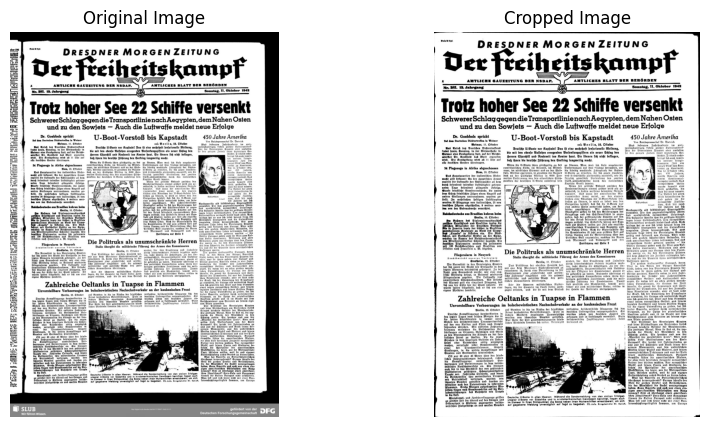

In [12]:
# Apply the auto_crop_image() function
original_image, cropped_image = auto_crop_image("raw_material_slub/00000001.tif.large.jpg")

# Set up a figure with two subplots for displaying images to visually compare the effects before and after processing
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the cropped image in the second subplot, if it exists
if cropped_image is not None:
    axes[1].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Cropped Image")
    save_path = "raw_material_slub/00000001_cropped.jpg"
    cv2.imwrite(save_path, cropped_image)
else:
    axes[1].text(0.5, 0.5, "No Change", horizontalalignment="center", verticalalignment="center")
    save_path = "raw_material_slub/00000001_uncropped.jpg"
    cv2.imwrite(save_path, original_image)
axes[1].axis("off")

plt.show()

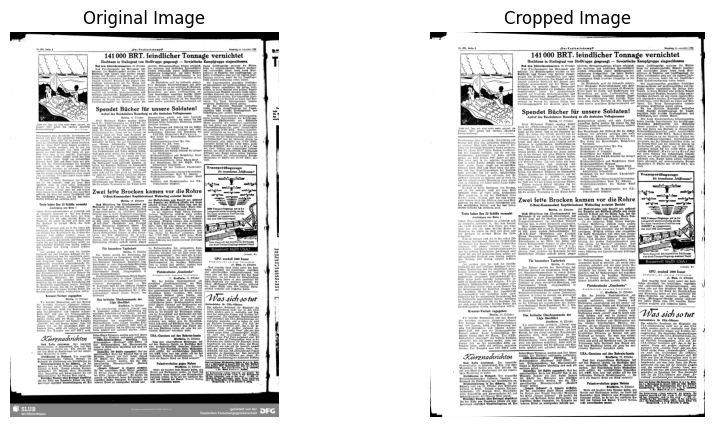

In [14]:
# Repeatedly and randomly select different images for testing
original_image, cropped_image = auto_crop_image("/Users/yu/Desktop/00000002.tif.large.jpg")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

if cropped_image is not None:
    axes[1].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Cropped Image")
    save_path = "/Users/yu/Desktop/linshi/result/00000004_cropped.jpg"
    cv2.imwrite(save_path, cropped_image)
else:
    axes[1].text(0.5, 0.5, "No Change", horizontalalignment="center", verticalalignment="center")
    save_path = "/Users/yu/Desktop/linshi/result/00000004_uncropped.jpg"
    cv2.imwrite(save_path, original_image)
axes[1].axis("off")

plt.show()

## 3. Possible further Processing
According to the original plan, further image processing can be performed based on the situation of the picture, such as correcting tilt. However, due to some unknown reasons, a suitable algorithm was not found for the new testcase, so the development of this function was suspended.